In [40]:
import pandas as pd
df = pd.read_csv("datasets/adult.data", sep=', ')

C:\Users\xiaomeng.yang\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


smart questions:
Answers: How workclass, education, occupation, race impact on income level

In [7]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [25]:
df.isnull().values.any()

False

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


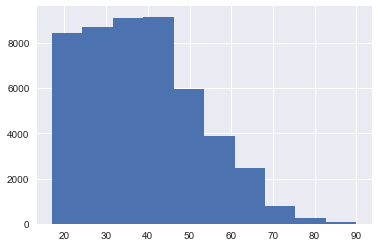

In [23]:
% matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt

plt.hist(df.age)
df.describe()

In [31]:
print(df.income.value_counts())
#df.columns.values

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64


In [42]:
equiv = {"<=50K":0,"<=50K.":0,">50K":1,">50K.":1}
df["income_new"] = df["income"].map(equiv)
print (df.head())
#df = pd.DataFrame({"income2": ["<=50K","<=50K.",">50K",">50K."]})
#df["income"] = df["income2"].map(equiv)
#print(df.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  \
0          2174             0              40  United-States  <=50K   
1             0             0           

In [43]:
import statsmodels.formula.api as smf

In [47]:
df.workclass.head()

0           State-gov
1    Self-emp-not-inc
2             Private
3             Private
4             Private
Name: workclass, dtype: object

In [48]:
# create a fitted model in one line
#formula notification is the equivalent to writing out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='income_new ~ age + fnlwgt', data=df).fit()

#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             income_new   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1372.
Date:                Mon, 28 Aug 2017   Prob (F-statistic):               0.00
Time:                        21:50:47   Log-Likelihood:                -26365.
No. Observations:               48842   AIC:                         5.274e+04
Df Residuals:                   48839   BIC:                         5.276e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0475      0.007     -7.011      0.000      -0.061      -0.034
age            0.0072      0.000     52.365      0.000       0.007       0.007
fnlwgt      4.598e-08   1.78e-08      2.577      0.010     1.1e-08    8.09e-08
==============================================================================
Omnibus:                     7546.066   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10118.868
Skew:                           1.084   Prob(JB):                         0.00
Kurtosis:                       2.482   Cond. No.                     7.83e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

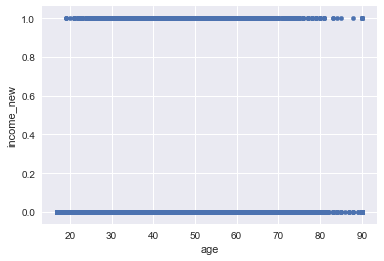

In [51]:
df.plot(kind='scatter', x='age', y='income_new')

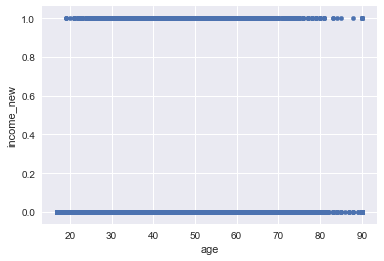

In [52]:
df.plot.scatter("age", "income_new")

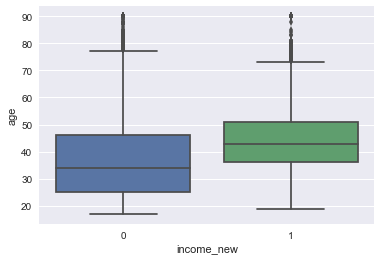

In [54]:
sns.boxplot(x="income_new", y="age", data=df)

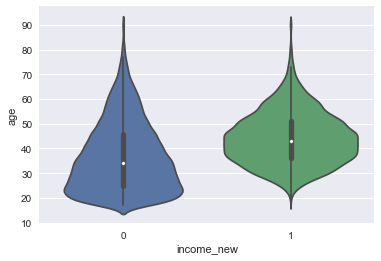

In [55]:
sns.violinplot(x="income_new", y= "age", data=df);